In [4]:
import numpy as np

import pandas as pd
import yfinance as yf
import seaborn as sns
import pandas_ta as ta

In [9]:
tickers_list = ['KAMAHOLD.BO']

data = yf.download(tickers_list,'2021-06-02')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-02,7070.000000,7070.000000,6825.100098,6933.350098,6743.091797,36
2021-06-03,7000.000000,7000.000000,6761.049805,6823.049805,6635.817871,717
2021-06-04,6995.000000,7659.600098,6800.000000,7184.149902,6987.009277,543
2021-06-07,7350.000000,7445.000000,7121.000000,7278.149902,7078.429688,181
2021-06-08,7380.000000,8242.000000,7125.000000,8027.899902,7807.605957,3200
...,...,...,...,...,...,...
2023-06-19,12450.000000,12648.849609,12298.750000,12301.950195,12301.950195,924
2023-06-20,12462.900391,12462.900391,12282.049805,12306.599609,12306.599609,196
2023-06-21,12470.000000,12470.000000,12275.000000,12366.700195,12366.700195,313


In [420]:
yearly = data.copy()
# yearly = yearly.set_index('Date')
yearly['Close'][-1]

608.2000122070312

In [386]:
from datetime import datetime

date = yearly.tail(1)
date.index[0].weekday()

1

In [387]:
yearly = yearly.resample('Y').agg(lambda x: x[-1]/x[1] - 1)

yearly['percent_change'] = yearly['Close'] * 100
yearly

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-12-31,0.029650,0.010932,0.019280,0.000133,0.011063,-0.297716,0.013259
2023-12-31,-0.193374,-0.193880,-0.198073,-0.194903,-0.194903,0.057322,-19.490328


In [388]:
daily = data.copy()
daily

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,1513.000000,1514.750000,1472.099976,1478.550049,1462.566284,8738508
2022-06-02,1484.000000,1513.849976,1475.599976,1508.000000,1491.697876,7205840
2022-06-03,1524.900024,1555.000000,1518.000000,1521.699951,1505.249756,9395707
2022-06-06,1516.000000,1536.599976,1493.000000,1530.050049,1513.509521,6624883
2022-06-07,1519.849976,1519.849976,1502.599976,1506.699951,1490.411865,4904592
...,...,...,...,...,...,...
2023-04-18,1269.949951,1269.949951,1253.099976,1259.349976,1259.349976,12430884
2023-04-19,1254.349976,1254.349976,1229.400024,1232.199951,1232.199951,11307230
2023-04-20,1230.699951,1237.849976,1221.400024,1223.400024,1223.400024,8621249


In [426]:
daily['percent_change'] = round(daily['Close'].pct_change()*100, 2)
daily

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-06-01,1513.000000,1514.750000,1472.099976,1478.550049,1462.566284,8738508,NaN
2022-06-02,1484.000000,1513.849976,1475.599976,1508.000000,1491.697876,7205840,1.99
2022-06-03,1524.900024,1555.000000,1518.000000,1521.699951,1505.249756,9395707,0.91
2022-06-06,1516.000000,1536.599976,1493.000000,1530.050049,1513.509521,6624883,0.55
2022-06-07,1519.849976,1519.849976,1502.599976,1506.699951,1490.411865,4904592,-1.53
...,...,...,...,...,...,...,...
2023-04-18,1269.949951,1269.949951,1253.099976,1259.349976,1259.349976,12430884,0.08
2023-04-19,1254.349976,1254.349976,1229.400024,1232.199951,1232.199951,11307230,-2.16
2023-04-20,1230.699951,1237.849976,1221.400024,1223.400024,1223.400024,8621249,-0.71


In [390]:
def change(x):
    val = 0
    try:
        val = x[-1]/x[0] - 1
    except Exception as e:
        print('Error in processing: ', e)

    return val


weekly = data.copy()
weekly = weekly.resample('W').agg(lambda x: change(x))

weekly['percent_change'] = weekly['Close'] * 100
weekly

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-06-05,0.007865,0.026572,0.031180,0.029184,0.029184,0.075207,2.918393
2022-06-12,-0.019723,-0.027756,-0.012994,-0.034803,-0.034803,-0.016370,-3.480278
2022-06-19,-0.036402,-0.032315,-0.031558,-0.026114,-0.026114,0.387018,-2.611439
2022-06-26,0.048883,0.031743,0.033936,0.019057,0.019057,0.330595,1.905735
2022-07-03,-0.009571,0.000674,-0.015562,0.003255,0.003255,0.031154,0.325515
2022-07-10,0.023476,0.016552,0.025958,0.017776,0.017776,-0.239081,1.777550
2022-07-17,-0.032776,-0.035936,-0.038018,-0.029053,-0.029053,0.195078,-2.905342
2022-07-24,0.057931,0.031066,0.030455,0.011007,0.011007,0.203160,1.100747
2022-07-31,0.035606,0.025409,0.032363,0.030660,0.030660,-0.108168,3.065973


In [391]:
weekly = data.copy()
weekly = weekly.resample('W-SUN').agg(lambda x: x[-1]/x[0] - 1)

weekly['percent_change'] = weekly['Close'] * 100
weekly

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-06-05,0.007865,0.026572,0.031180,0.029184,0.029184,0.075207,2.918393
2022-06-12,-0.019723,-0.027756,-0.012994,-0.034803,-0.034803,-0.016370,-3.480278
2022-06-19,-0.036402,-0.032315,-0.031558,-0.026114,-0.026114,0.387018,-2.611439
2022-06-26,0.048883,0.031743,0.033936,0.019057,0.019057,0.330595,1.905735
2022-07-03,-0.009571,0.000674,-0.015562,0.003255,0.003255,0.031154,0.325515
2022-07-10,0.023476,0.016552,0.025958,0.017776,0.017776,-0.239081,1.777550
2022-07-17,-0.032776,-0.035936,-0.038018,-0.029053,-0.029053,0.195078,-2.905342
2022-07-24,0.057931,0.031066,0.030455,0.011007,0.011007,0.203160,1.100747
2022-07-31,0.035606,0.025409,0.032363,0.030660,0.030660,-0.108168,3.065973


In [149]:
weekly = data.copy()
weekly.index[-1]

Timestamp('2023-04-18 00:00:00')

In [150]:
monthly = data.copy()
monthly = monthly.resample('M').agg(lambda x: x[-1]/x[1] - 1)

monthly['percent_change'] = monthly['Close'] * 100
monthly

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-04-30,0.009524,0.000626,-0.001408,-0.012691,-0.012691,-0.079349,-1.269125
2022-05-31,-0.023623,-0.033121,-0.027448,-0.020807,-0.010437,1.577393,-2.080692
2022-06-30,-0.012770,-0.021039,-0.013960,-0.030570,-0.030570,0.271910,-3.057028
2022-07-31,0.035501,0.042520,0.045144,0.041465,0.041465,0.460237,4.146502
2022-08-31,-0.047493,-0.032902,-0.040796,-0.032813,-0.032813,0.537471,-3.281292
2022-09-30,-0.060250,-0.039716,-0.049724,-0.027220,-0.027220,0.568909,-2.721958
2022-10-31,0.077869,0.079700,0.082214,0.075731,0.087487,-0.315020,7.573107
2022-11-30,0.030503,0.046416,0.044110,0.052565,0.052565,3.038283,5.256544
2022-12-31,-0.077295,-0.079071,-0.079501,-0.079187,-0.079187,0.181447,-7.918681


In [112]:
quarter = data.copy()
quarter = quarter.resample('Q').agg(lambda x: x[-1]/x[1] - 1)

quarter['percent_change'] = quarter['Close'] * 100
quarter

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-06-30,-0.090164,-0.104418,-0.091667,-0.095041,-0.095041,-0.829145,-9.504137
2022-09-30,0.063636,0.075893,0.063927,0.067265,0.067265,1.554807,6.726458
2022-12-31,1.627615,1.697095,1.652542,1.658228,1.658228,14.091459,165.822776
2023-03-31,-0.217116,-0.248889,-0.232484,-0.259146,-0.259146,-0.834892,-25.914635
2023-06-30,0.005725,0.079696,0.033730,0.078740,0.078740,2.573109,7.874016


In [113]:
quarter = data.copy()
quarter = quarter.resample('Q').agg(lambda x: x[-1]/x[0] - 1)

quarter['percent_change'] = quarter['Close'] * 100
quarter

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-06-30,-0.097561,-0.093496,-0.095436,-0.095041,-0.095041,-0.636626,-9.504137
2022-09-30,0.063636,0.075893,0.083721,0.076923,0.076923,2.116990,7.692302
2022-12-31,1.649789,1.719665,1.663830,1.669491,1.669491,19.967947,166.949148
2023-03-31,-0.223270,-0.209048,-0.226324,-0.224880,-0.224880,-0.608525,-22.488042
2023-06-30,0.079918,0.081749,0.076446,0.053846,0.053846,0.817936,5.384614


In [66]:
today = list(filter(lambda index, row: row['percent_change'] >= 5, quarter.iterrows()))
today

TypeError: <lambda>() missing 1 required positional argument: 'row'

In [75]:
result = quarter.loc[quarter['percent_change'] < 5]
list = result['percent_change'].tolist()
list

[-2.358310505919825, -9.24182926975784, 1.0846897388515186]

In [77]:
len(list) / len(quarter) * 100

60.0

In [81]:
count = len(list)
percent = (len(list) / len(quarter) * 100)
str(count) + ' (' +  '%.2f' % percent + ' %)'

'3 (60.00 %)'

In [153]:
x1 = 1269.949951
x0 = 1410.849976

x1 / x0 - 1


0.012120335465065857

In [175]:
index = 'year'
df = data.copy()
df = df.reset_index()
df.index = pd.to_datetime(df.Date)

df['Year']=df.index.strftime('%Y')
df['year']=df.index.strftime('%Y')
df['Month']=df.index.strftime('%m')
df['Day']=df.index.strftime('%w')
# df['Quarter']=df['Date'].dt.quarter
# df['Week']=df['Date'].dt.week

output = pd.pivot_table(data=df, 
        index=index, 
        columns=['Year'], 
        values='Close',
        aggfunc=lambda x: change(x))

output

Year,2023
year,
2023,-0.173655


In [187]:
my_list = [1, 2, 3, 4, 5]
my_list = [1, 1, 1]

def test(iterator):

    # create an iterator from the list
    iterator = iter(iterator)

    try:
        first = next(iterator)
    except StopIteration:
        return True

    return all(first == x for x in iterator)

test(my_list)

True

In [197]:
d = {'1': 2.15, '2': 6.56, '3': 10.49, '4': 10.88, '5': 7.14}
min(d, key=d.get)

'1'

In [236]:
xx = data.copy()

xx['percent_change'] = df['Close'].pct_change()*100

xx = xx.tail(10)

xx

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2023-03-31,1404.000000,1429.949951,1393.900024,1427.949951,1427.949951,8711975,3.209129
2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1410.849976,5242764,-1.197519
2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1423.550049,7506334,0.900172
2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1421.900024,6948465,-0.115909
2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1427.599976,4993788,0.400869
2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1406.150024,6942255,-1.502518
2023-04-12,1413.050049,1431.500000,1400.000000,1428.300049,1428.300049,5831169,1.575225
2023-04-13,1409.750000,1411.050049,1383.000000,1389.199951,1389.199951,11267238,-2.737527
2023-04-17,1250.300049,1261.150024,1185.300049,1258.300049,1258.300049,53171705,-9.422683


In [237]:
xx['Day']=xx.index.strftime('%w')
xx

,Open,High,Low,Close,Adj Close,Volume,percent_change,Day
Date,,,,,,,,
2023-03-31,1404.000000,1429.949951,1393.900024,1427.949951,1427.949951,8711975,3.209129,5
2023-04-03,1435.000000,1435.000000,1405.150024,1410.849976,1410.849976,5242764,-1.197519,1
2023-04-05,1400.000000,1427.500000,1400.000000,1423.550049,1423.550049,7506334,0.900172,3
2023-04-06,1416.000000,1428.400024,1410.349976,1421.900024,1421.900024,6948465,-0.115909,4
2023-04-10,1423.949951,1434.000000,1415.000000,1427.599976,1427.599976,4993788,0.400869,1
2023-04-11,1428.900024,1433.349976,1389.000000,1406.150024,1406.150024,6942255,-1.502518,2
2023-04-12,1413.050049,1431.500000,1400.000000,1428.300049,1428.300049,5831169,1.575225,3
2023-04-13,1409.750000,1411.050049,1383.000000,1389.199951,1389.199951,11267238,-2.737527,4
2023-04-17,1250.300049,1261.150024,1185.300049,1258.300049,1258.300049,53171705,-9.422683,1


In [455]:
yearly = data.copy()
# yearly = yearly.set_index('Date')
yearly.round(2)

stoc = yearly.ta.stoch(high='High', low='Low', k=20, d=3, append=True)
stoc.tail(10)

,STOCHk_20_3_3,STOCHd_20_3_3
Date,,
2023-04-17,47.694404,52.004993
2023-04-18,50.450925,50.541666
2023-04-19,57.750571,51.965300
2023-04-20,65.356483,57.852659
2023-04-21,64.335554,62.480869
2023-04-24,56.848742,62.180260
2023-04-25,52.543817,57.909371
2023-04-26,50.316264,53.236274
2023-04-27,55.262404,52.707495


<Axes: xlabel='Date'>

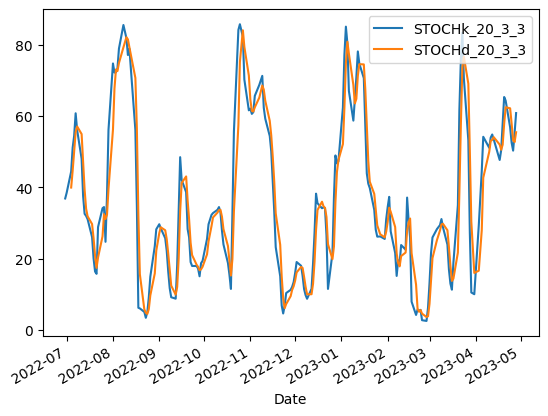

In [456]:
stoc.plot.line()

In [ ]:
string = "abacasab"

elements = dict(map(lambda x: (a: string.), string))

In [348]:
def segregate(str):
    dict = {}

    repeated = []
    norepeat = []

    for i in str:
        if i in dict:
            dict[i] = dict[i] + 1
        else:
            dict[i] = 1

    for key, value in dict.items():
        if value > 1:
            repeated.append(key)
        else:
            norepeat.append(key)

    return (repeated, norepeat)

string = "abacasab"

rep, norep = segregate(string)

print('repeated', rep)
print('no rep', norep)


repeated ['a', 'b']
no rep ['c', 's']


In [438]:
mean_df = data['Close'].copy()

def get_mean_df(df):

    mean_df = data['Close'].copy()
    mean_df = df.reset_index()
    mean_df.set_index('Date', inplace=True)

    mean_df = mean_df.resample('Y').mean()

    return mean_df

mean_df = get_mean_df(mean_df)


mean_df

,Close
Date,
2022-12-31,678.672111
2023-12-31,617.312988


In [441]:
len(mean_df.index)

2

<Axes: xlabel='Date'>

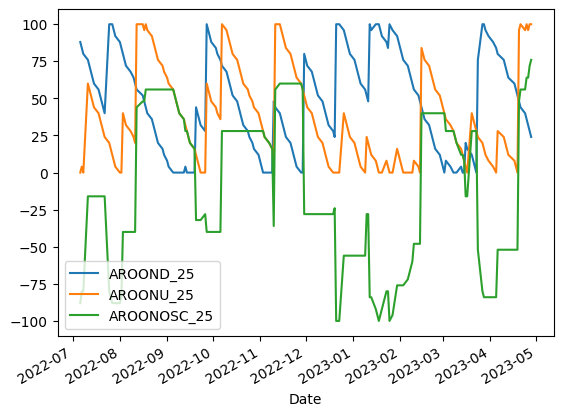

In [451]:
aroon = data.copy()

kk = ta.aroon(aroon['High'], aroon['Low'], 25)

kk.plot.line()

<Axes: xlabel='Date'>

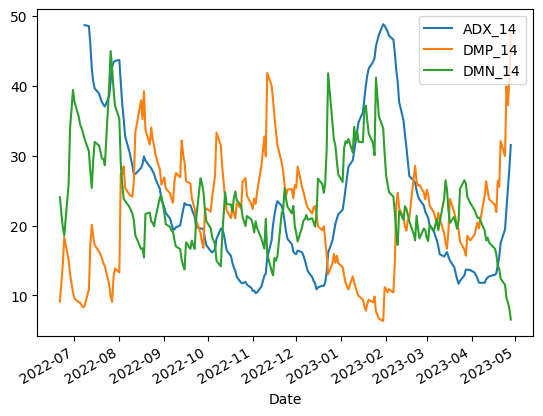

In [453]:
adx = ta.adx(aroon['High'], aroon['Low'], aroon['Close'],length = 14)

adx.plot.line()

In [461]:
monthly = data.copy()
monthly = monthly.resample('M').mean()

monthly['percent_change'] = monthly['Close']

monthly['Close']

Date
2022-06-30    801.147724
2022-07-31    784.919044
2022-08-31    781.654993
2022-09-30    735.140908
2022-10-31    724.400005
2022-11-30    721.838100
2022-12-31    704.465904
2023-01-31    718.090480
2023-02-28    666.185004
2023-03-31    615.633336
2023-04-30    607.002944
Freq: M, Name: Close, dtype: float64

In [474]:
df_lookup = monthly.iloc[-5:]

for idx, row in df_lookup.iterrows():
    print(row)

Open                704.256814
High                712.584095
Low                 700.086362
Close               704.465904
Adj Close           703.305814
Volume            15611.227273
percent_change      704.465904
Name: 2022-12-31 00:00:00, dtype: float64
Open                717.176191
High                725.759527
Low                 711.009524
Close               718.090480
Adj Close           716.907956
Volume            18742.285714
percent_change      718.090480
Name: 2023-01-31 00:00:00, dtype: float64
Open                670.975003
High                676.575006
Low                 659.459995
Close               666.185004
Adj Close           665.236850
Volume            27164.750000
percent_change      666.185004
Name: 2023-02-28 00:00:00, dtype: float64
Open                619.709525
High                626.561907
Low                 607.385713
Close               615.633336
Adj Close           615.633336
Volume            20103.000000
percent_change      615.633336
Name: 